In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy import stats

In [2]:
data = pd.read_csv('../data/data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<h4>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.</h4>
    
    Variables:

<li> ID number
<li> Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

<li>radius (mean of distances from center to points on the perimeter)
    texture (standard deviation of gray-scale values)
<li>perimeter
<li>area
<li> smoothness (local variation in radius lengths)
<li> compactness (perimeter^2 / area - 1.0)
<li> concavity (severity of concave portions of the contour)
<li> concave points (number of concave portions of the contour)
<li> symmetry
<li> fractal dimension ("coastline approximation" - 1)
    
NB: The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 32 numerical variables


In [7]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [8]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'diagnosis'.
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])
  
data['diagnosis'].unique()

array([1, 0])

melignant- 1
benign - 0

In [9]:
# what is the % of missing values in the dataset?
def percent_missing(data):

    # Calculate total number of cells in dataframe
    totalCells = np.product(data.shape)

    # Count number of missing values per column
    missingCount = data.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The dataset contains 3.03 % missing values.


In [10]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# drop columns with high number of missing values
data_dropped = data.drop(['Unnamed: 32'], axis=1)
data_dropped

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data_dropped.groupby(['diagnosis']).count().unstack().head(30)

                        diagnosis
id                      0            357
                        1            212
radius_mean             0            357
                        1            212
texture_mean            0            357
                        1            212
perimeter_mean          0            357
                        1            212
area_mean               0            357
                        1            212
smoothness_mean         0            357
                        1            212
compactness_mean        0            357
                        1            212
concavity_mean          0            357
                        1            212
concave points_mean     0            357
                        1            212
symmetry_mean           0            357
                        1            212
fractal_dimension_mean  0            357
                        1            212
radius_se               0            357
                       

<li>There are 569 instances of data.
<li>Total number of features equals 33, of which 31 is numerical, plus Id and diagnosis.
<li>One feature (Unnamed: 32) has missing values in the dataset
<li>There is one unique column which is 'Id'

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


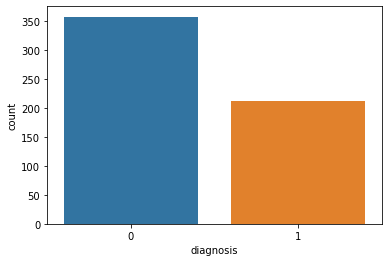

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
sns.countplot(data_dropped["diagnosis"])
plt.show()
data_dropped["diagnosis"].value_counts()

More Benign than Melignant

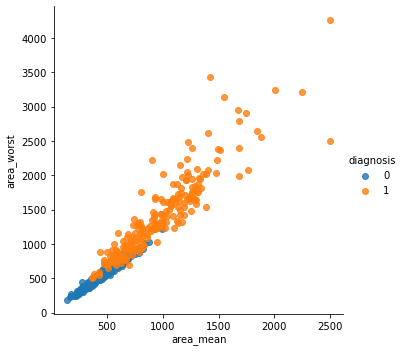

In [14]:
sns.lmplot(x='area_mean', y='area_worst', hue='diagnosis', fit_reg=False, data=data_dropped)

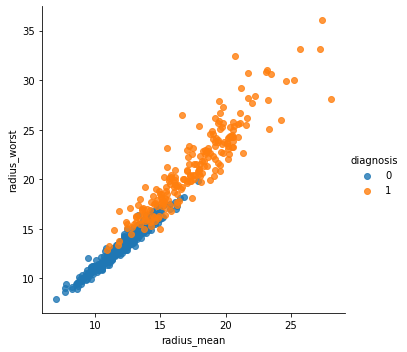

In [15]:
sns.lmplot(x='radius_mean', y='radius_worst', hue='diagnosis', fit_reg=False, data=data_dropped)

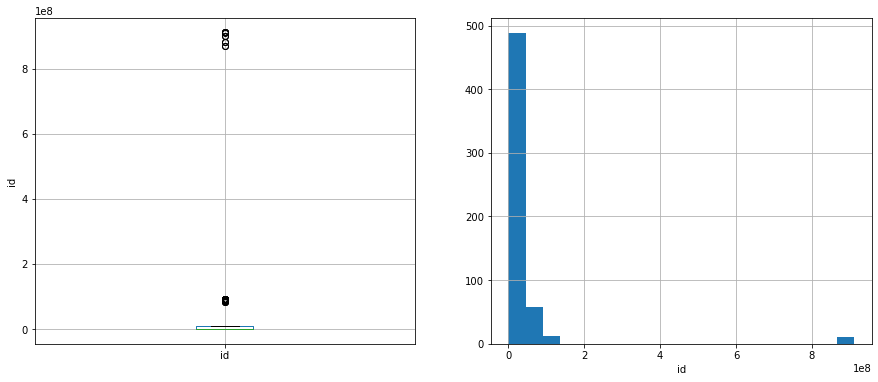

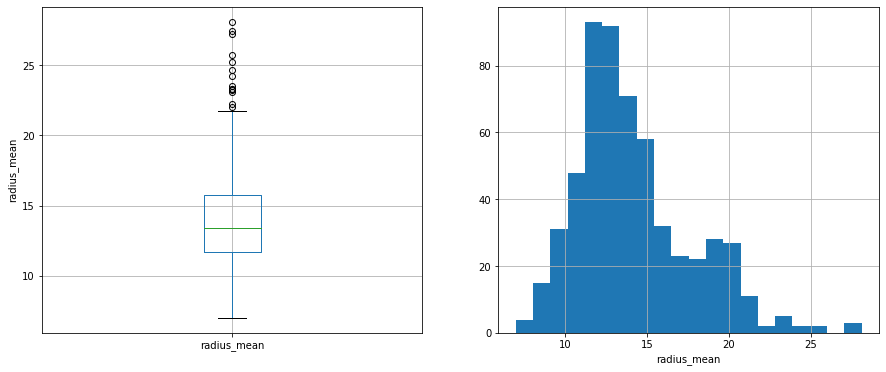

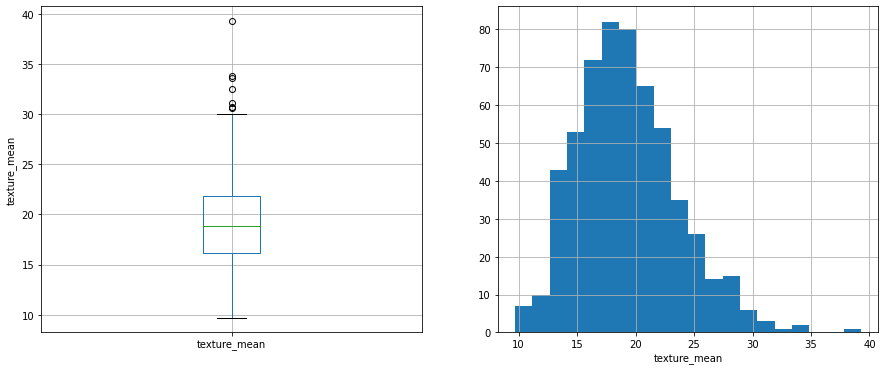

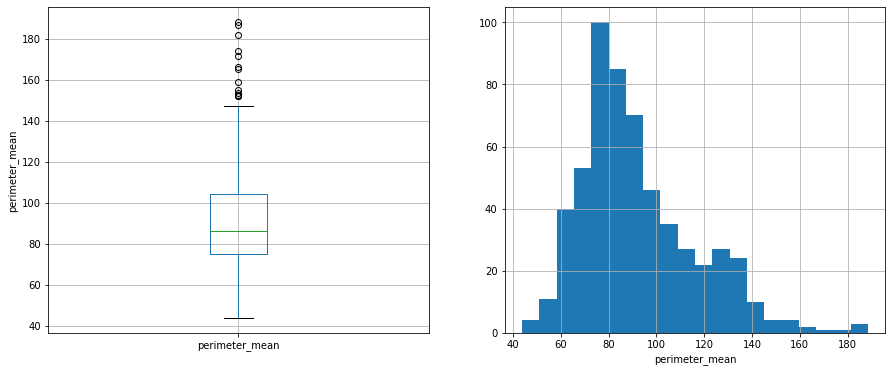

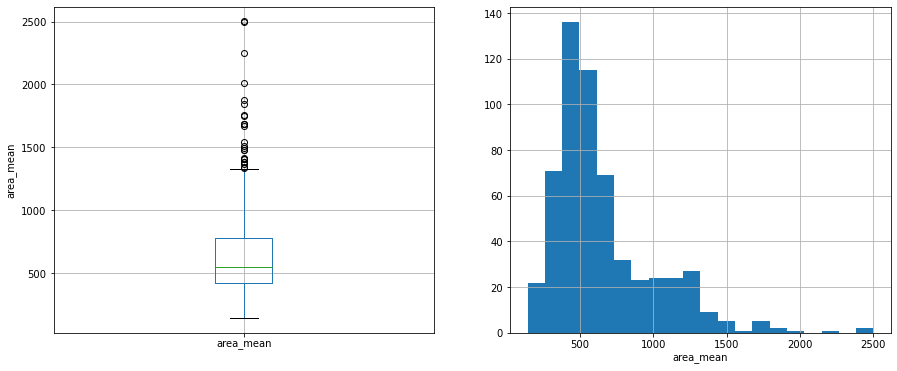

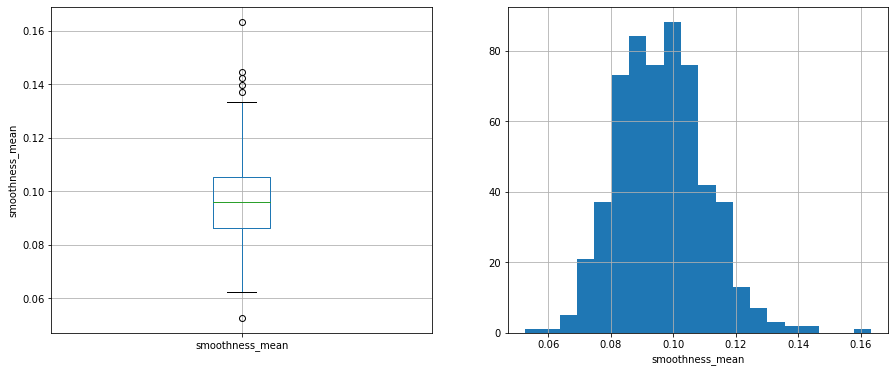

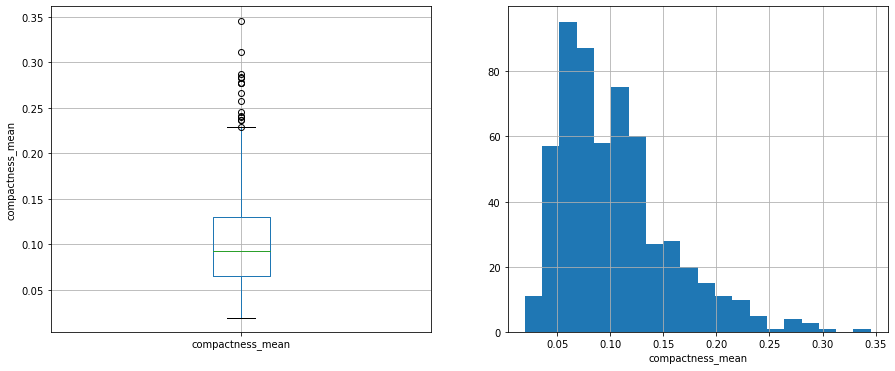

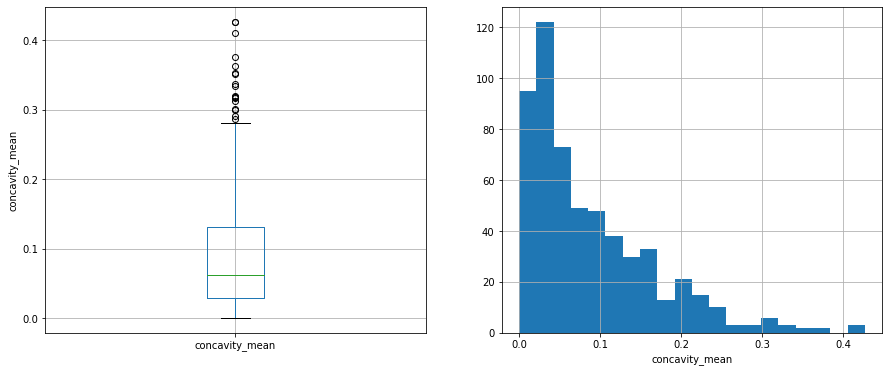

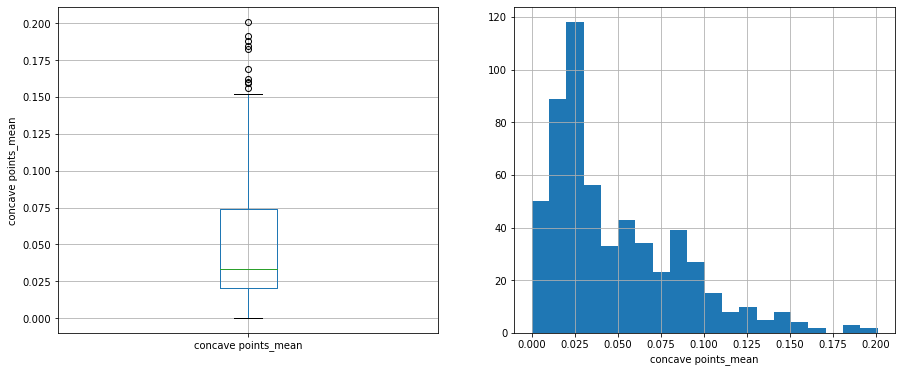

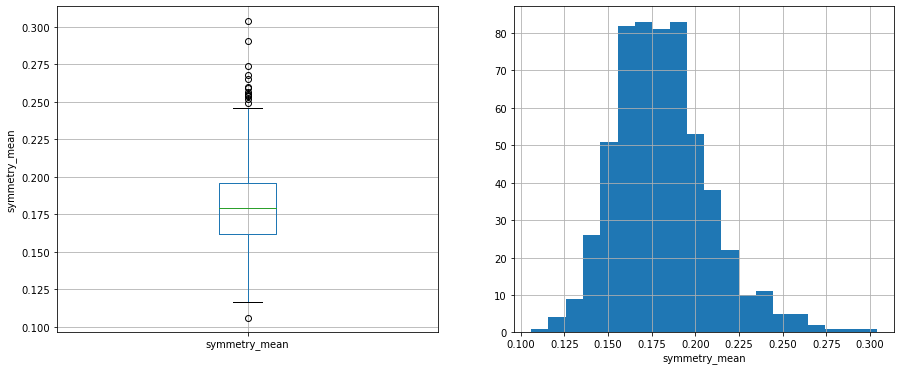

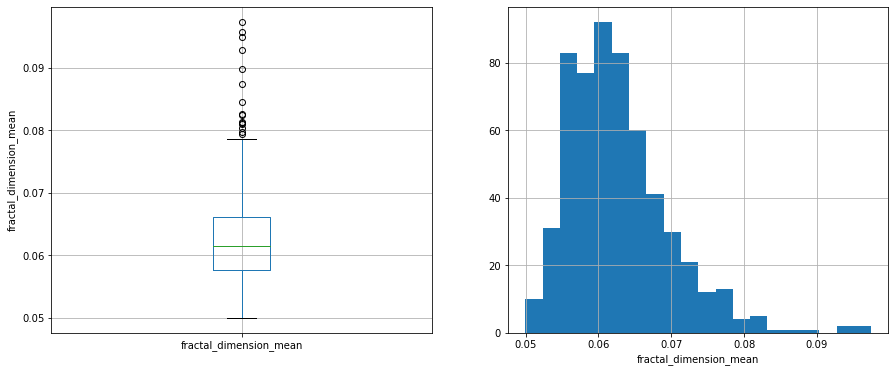

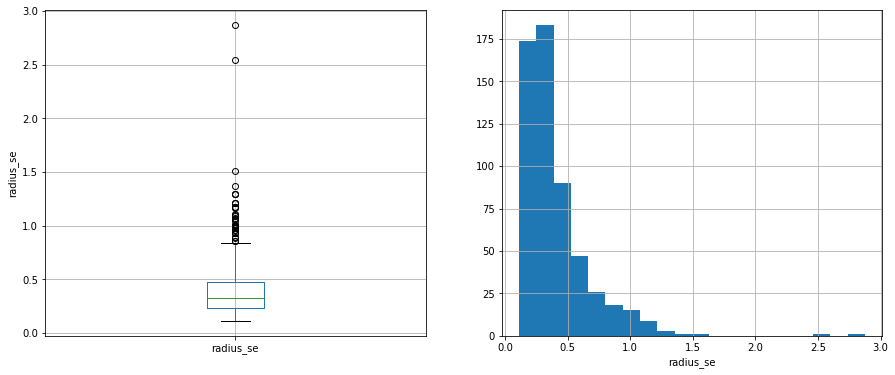

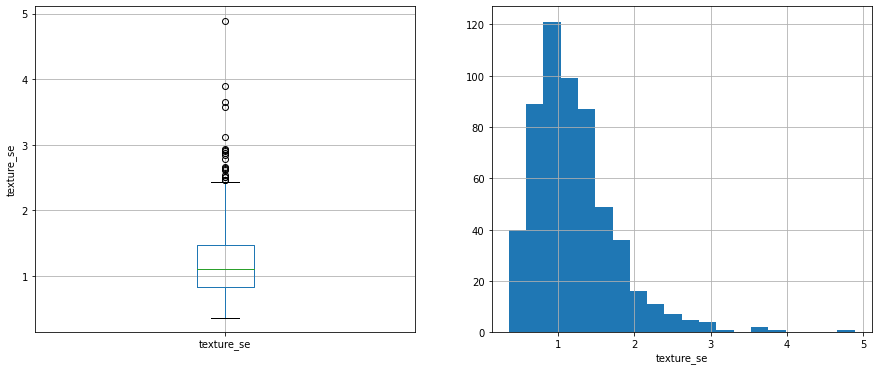

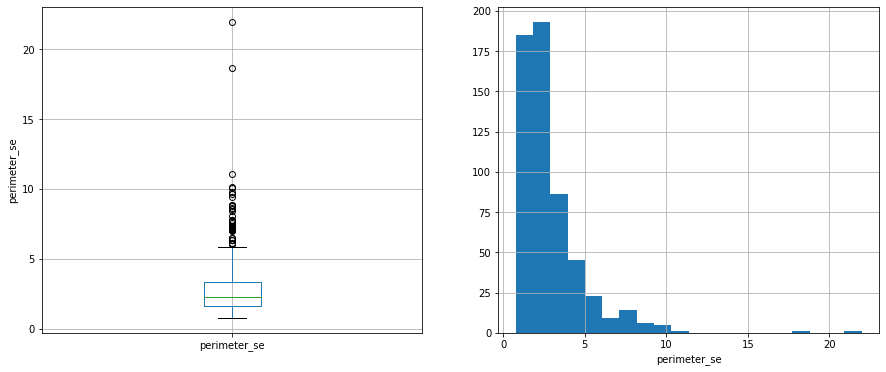

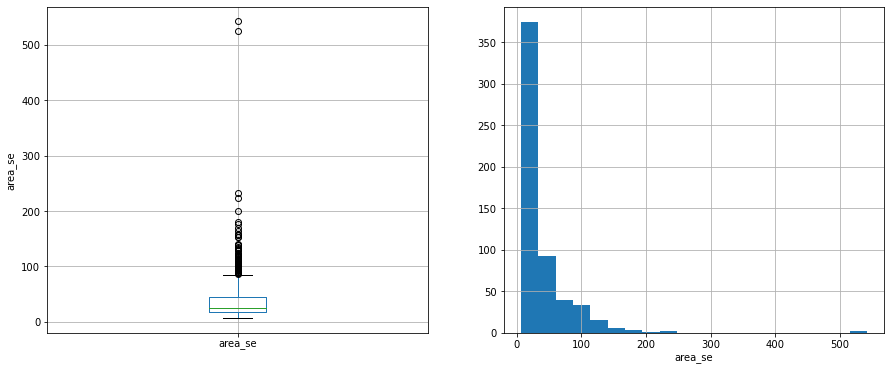

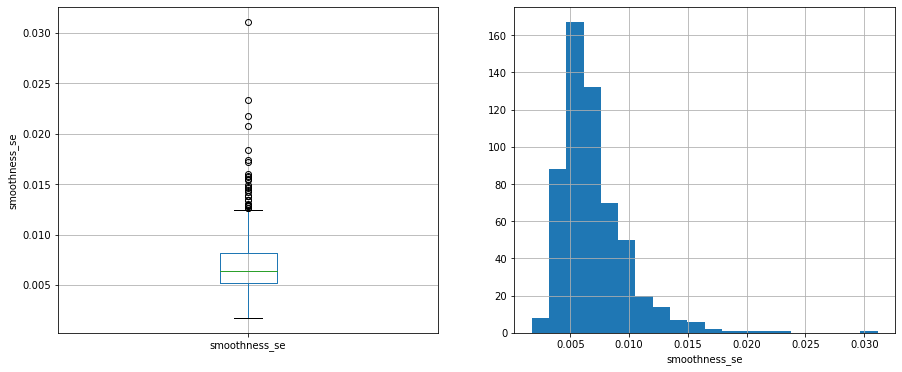

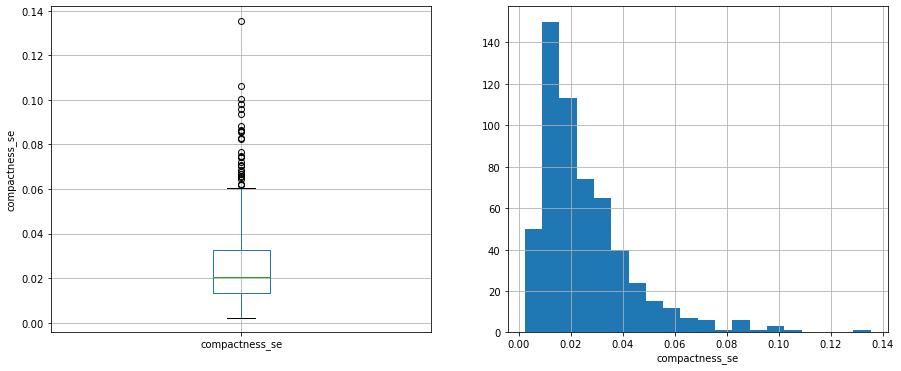

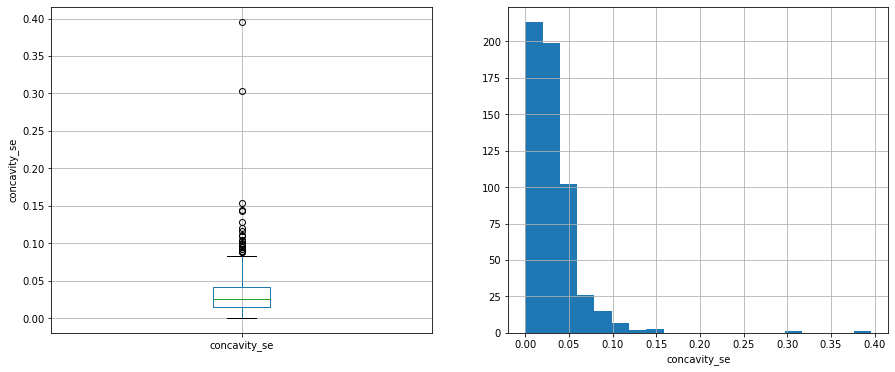

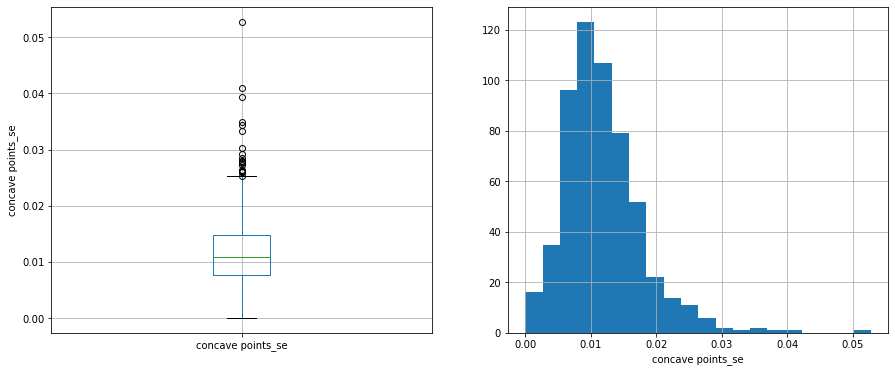

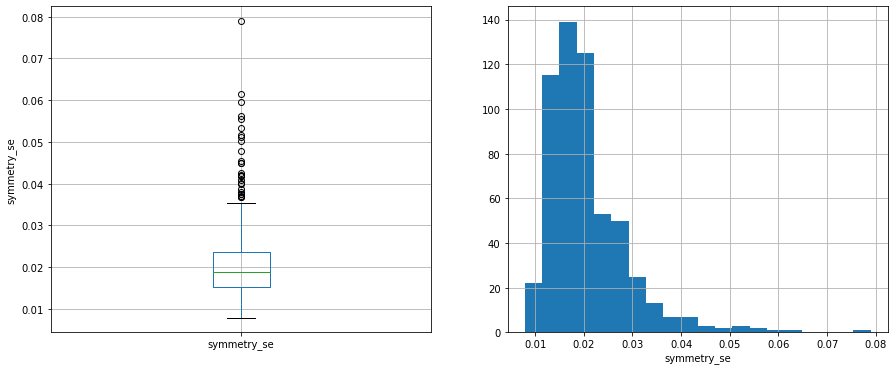

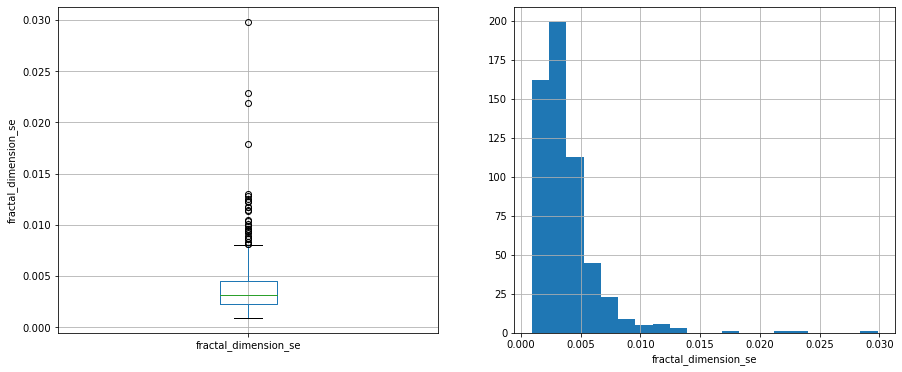

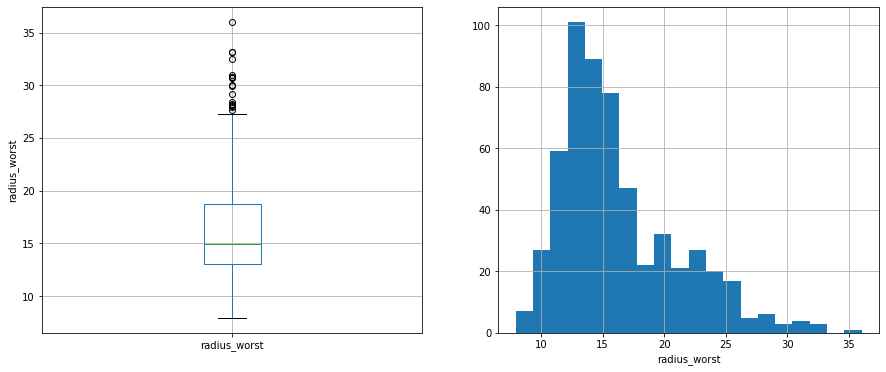

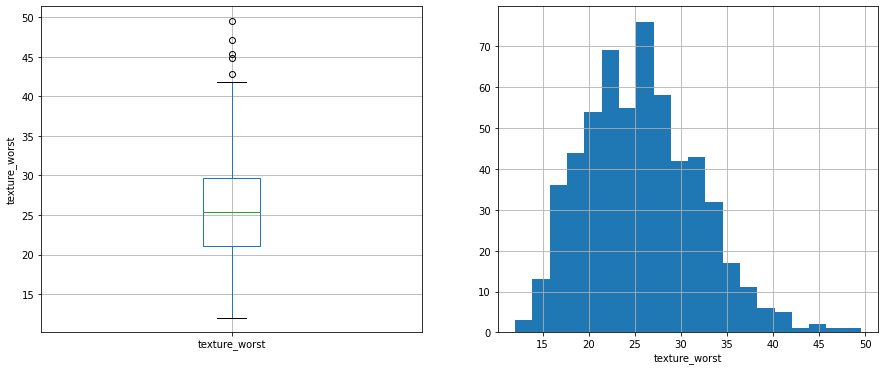

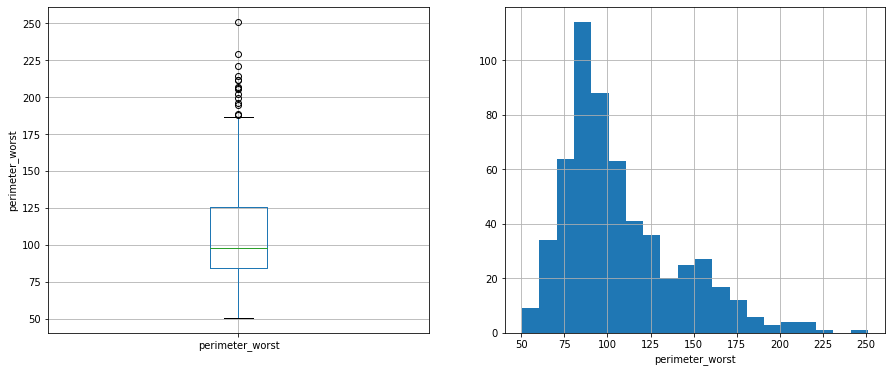

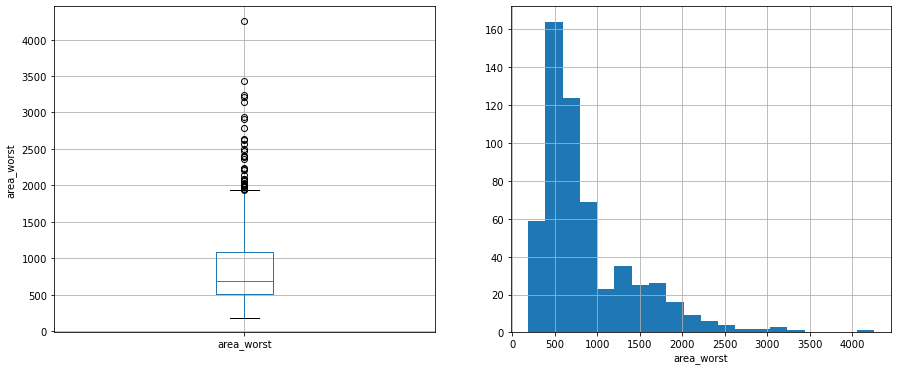

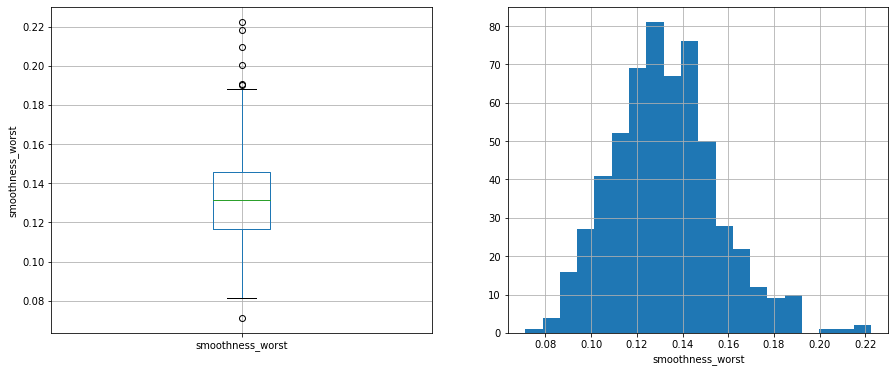

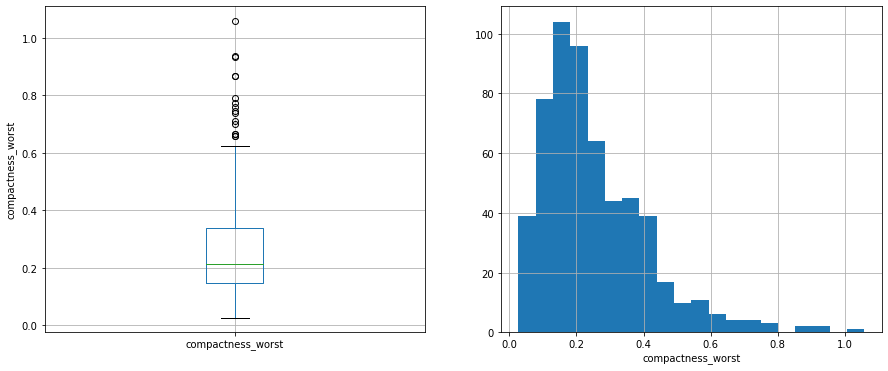

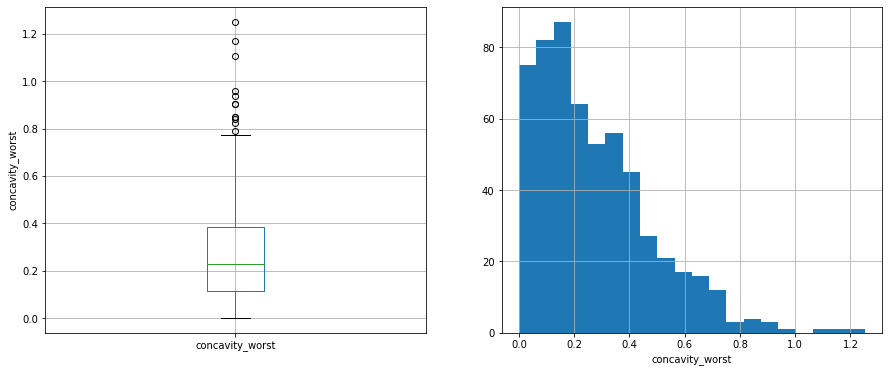

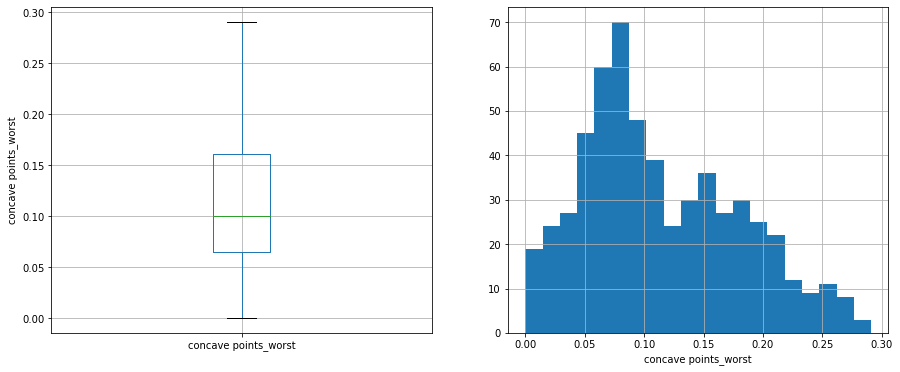

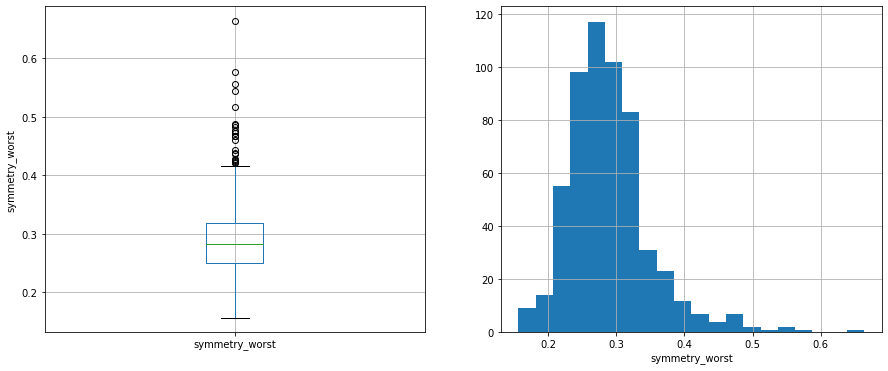

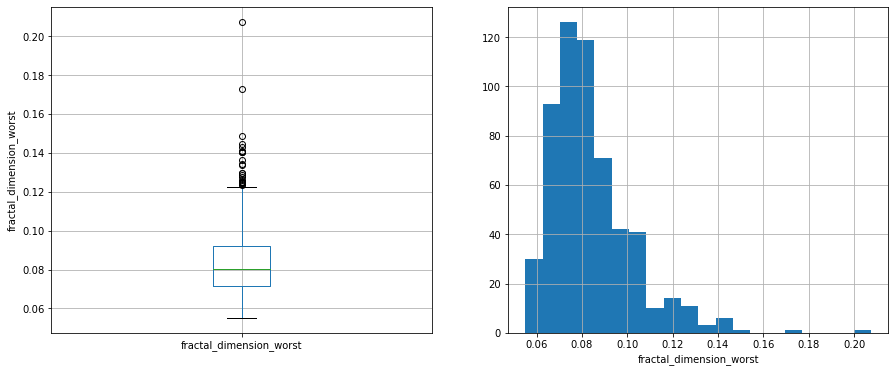

KeyError: "None of [Index(['Unnamed: 32'], dtype='object')] are in the [columns]"

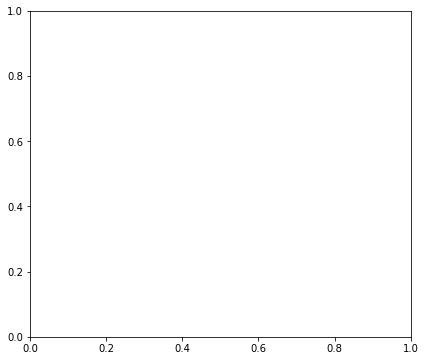

In [16]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data_dropped.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data_dropped[var].hist(bins=20)
    fig.set_xlabel(var)

    plt.show()

Most of the variables have outliers therefore we will handle the outliers first

In [ ]:
#data = pd.DataFrame(columns=['id','diagnosis','radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_worst','texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
#df = pd.DataFrame(columns=['radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_worst','texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])

In [17]:
#cols = ['radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se','perimeter_se','area_se','smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] # one or more
cols = ['radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se','perimeter_se','area_se','smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Q1 = data_dropped[cols].quantile(0.25)
Q3 = data_dropped[cols].quantile(0.75)
IQR = Q3 - Q1

df = data_dropped[~((data_dropped[cols] < (Q1 - 1.5 * IQR)) |(data_dropped[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,84610002,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,846381,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,924934,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,925277,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


<AxesSubplot:xlabel='symmetry_worst'>

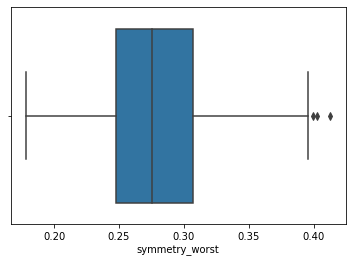

In [18]:
sns.boxplot(x=df['symmetry_worst'])

### Successfully handled the outliers

In [19]:
radius_df = df[["radius_mean","radius_se", "radius_worst"]].mean()
print(radius_df)

radius_mean     13.376209
radius_se        0.306608
radius_worst    15.087623
dtype: float64


In [20]:
texture_df = df[["texture_mean","texture_se", "texture_worst"]].mean()
print(texture_df)

texture_mean     18.505879
texture_se        1.092313
texture_worst    24.723015
dtype: float64


In [21]:
perimeter_df = df[["perimeter_mean","perimeter_se", "perimeter_worst"]].mean()
print(perimeter_df)

perimeter_mean     86.403266
perimeter_se        2.153439
perimeter_worst    98.640477
dtype: float64


In [22]:
area_df = df[["area_mean","area_se", "area_worst"]].mean()
print(area_df)

area_mean     570.547990
area_se        26.512990
area_worst    728.471608
dtype: float64


In [23]:
smoothness_df = df[["smoothness_mean","smoothness_se", "smoothness_worst"]].mean()
print(smoothness_df)

smoothness_mean     0.093271
smoothness_se       0.006390
smoothness_worst    0.128684
dtype: float64


In [24]:
compactness_df = df[["compactness_mean","compactness_se", "compactness_worst"]].mean()
print(compactness_df)

compactness_mean     0.086260
compactness_se       0.019689
compactness_worst    0.211521
dtype: float64


In [25]:
concavity_df = df[["concavity_mean","concavity_se", "concavity_worst"]].mean()
print(concavity_df)

concavity_mean     0.060442
concavity_se       0.024014
concavity_worst    0.213448
dtype: float64


In [26]:
concave_points_df = df[["concave points_mean","concave points_se", "concave points_worst"]].mean()
print(concave_points_df)

concave points_mean     0.035902
concave points_se       0.009910
concave points_worst    0.096333
dtype: float64


In [27]:
symmetry_df = df[["symmetry_mean","symmetry_se", "symmetry_worst"]].mean()
print(symmetry_df)

symmetry_mean     0.173639
symmetry_se       0.018632
symmetry_worst    0.279092
dtype: float64


In [28]:
fractal_dimension_df = df[["fractal_dimension_mean","fractal_dimension_se", "fractal_dimension_worst"]].mean()
print(fractal_dimension_df)

fractal_dimension_mean     0.061211
fractal_dimension_se       0.002998
fractal_dimension_worst    0.079529
dtype: float64


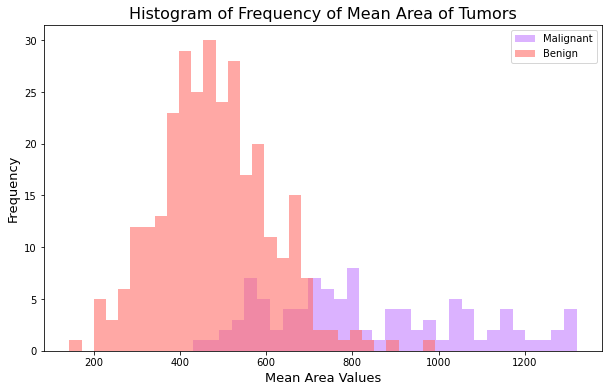

In [29]:
plt.figure(figsize=(10, 6))
M = plt.hist(df[df.diagnosis == 1].area_mean, bins=30, label='Malignant', alpha=0.5, color='#b967ff')
B = plt.hist(df[df.diagnosis == 0].area_mean, bins=30, label='Benign', alpha=0.6, color='#ff6f69')
plt.legend()
plt.xlabel('Mean Area Values', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of Frequency of Mean Area of Tumors', fontsize=16)
plt.show()

In [30]:
# Calculating the maximum mean area of malignant and benign tumors

print('The Maximum Mean Area for Malignant Tumor is',M[0].max())
print('The Maximum Mean Area for Benign Tumor is',B[0].max())

The Maximum Mean Area for Malignant Tumor is 8.0
The Maximum Mean Area for Benign Tumor is 30.0


From the above graphs we can observe that the Area Mean of Benign tumors are roughly Normally(Gaussian) Distributed

In [31]:
X = df.drop("diagnosis",1)   #Feature Matrix
y = df["diagnosis"]          #Target Variable

C:\Users\user\AppData\Local\Temp\ipykernel_22476\2942734264.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("diagnosis",1)   #Feature Matrix


### Feature extraction
Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features). 

### Variance Inflation Factor

In [32]:
#Variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                    feature            VIF
0                        id       1.130764
1               radius_mean  154012.267104
2              texture_mean     419.846702
3            perimeter_mean  134919.448297
4                 area_mean    3395.531903
5           smoothness_mean     625.743030
6          compactness_mean     231.137097
7            concavity_mean     139.718635
8       concave points_mean     135.089465
9             symmetry_mean     262.917124
10   fractal_dimension_mean     994.033311
11                radius_se     482.302643
12               texture_se      57.791347
13             perimeter_se     274.621337
14                  area_se     287.999303
15            smoothness_se      66.333553
16           compactness_se     100.414143
17             concavity_se      68.720993
18        concave points_se      93.411285
19              symmetry_se      86.285817
20     fractal_dimension_se      69.361507
21             radius_worst   20258.437401
22         

In [33]:
X = df.drop("diagnosis",1)   #Feature Matrix
y = df["diagnosis"]          #Target Variable
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_22476\68432842.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("diagnosis",1)   #Feature Matrix


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,845636,1,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,84610002,1,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,846381,1,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


### Correlation analysis 

C:\Users\user\AppData\Local\Temp\ipykernel_22476\3390662966.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


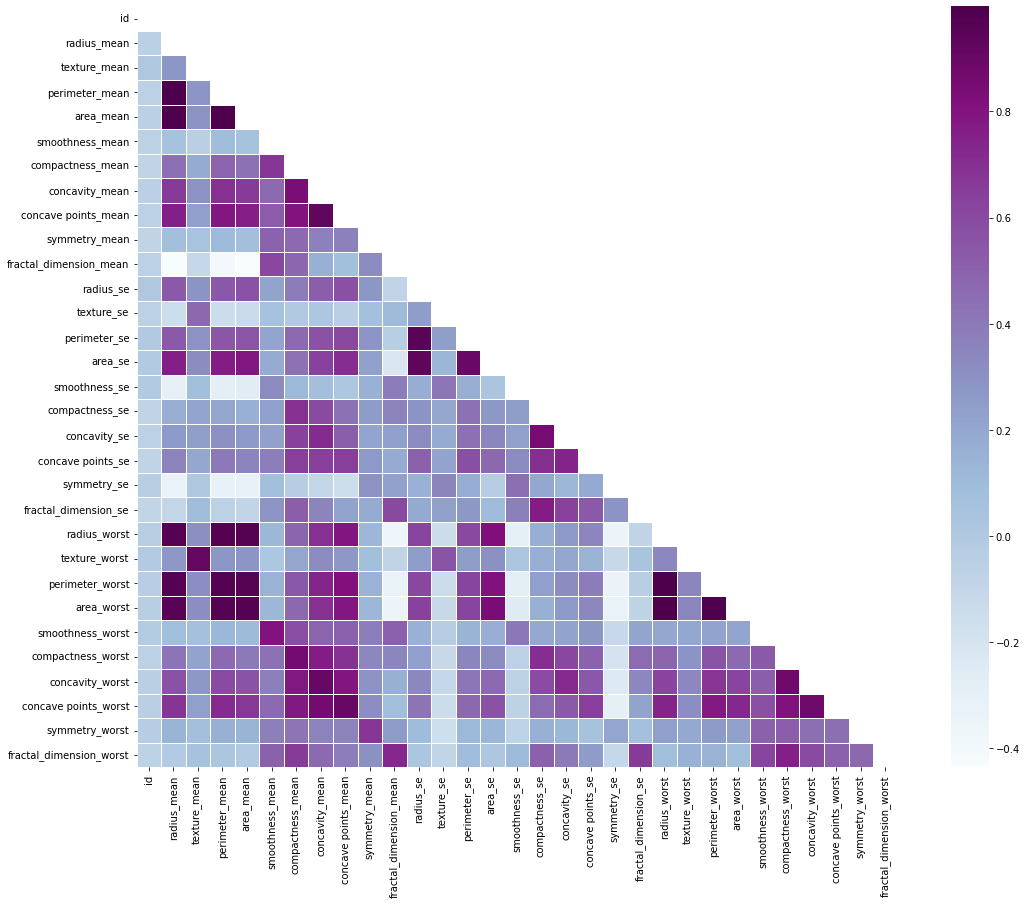

In [34]:
# Compute the correlation matrix 
corr_all = df.drop('diagnosis', axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (19, 14))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

from expert option, we conclude that radius_mean is the cofouding variable

In [35]:
#Correlation with output variable
cor_target = abs(corr_all["radius_mean"])
cor_target 

id                         0.053707
radius_mean                1.000000
texture_mean               0.280796
perimeter_mean             0.998113
area_mean                  0.992047
smoothness_mean            0.055311
compactness_mean           0.442360
concavity_mean             0.658031
concave points_mean        0.755607
symmetry_mean              0.075653
fractal_dimension_mean     0.436397
radius_se                  0.534801
texture_se                 0.149935
perimeter_se               0.530347
area_se                    0.758127
smoothness_se              0.301325
compactness_se             0.165214
concavity_se               0.265486
concave points_se          0.363046
symmetry_se                0.327179
fractal_dimension_se       0.100183
radius_worst               0.971286
texture_worst              0.273847
perimeter_worst            0.964851
area_worst                 0.957772
smoothness_worst           0.087209
compactness_worst          0.416464
concavity_worst            0

In [36]:
#Selecting highly correlated features
correlated_features = cor_target[cor_target>0.5]
correlated_features

radius_mean             1.000000
perimeter_mean          0.998113
area_mean               0.992047
concavity_mean          0.658031
concave points_mean     0.755607
radius_se               0.534801
perimeter_se            0.530347
area_se                 0.758127
radius_worst            0.971286
perimeter_worst         0.964851
area_worst              0.957772
concavity_worst         0.563240
concave points_worst    0.682235
Name: radius_mean, dtype: float64

In [37]:
#Selecting uncorrelated features
uncorrelated_features = cor_target[cor_target<0.5]
uncorrelated_features

id                         0.053707
texture_mean               0.280796
smoothness_mean            0.055311
compactness_mean           0.442360
symmetry_mean              0.075653
fractal_dimension_mean     0.436397
texture_se                 0.149935
smoothness_se              0.301325
compactness_se             0.165214
concavity_se               0.265486
concave points_se          0.363046
symmetry_se                0.327179
fractal_dimension_se       0.100183
texture_worst              0.273847
smoothness_worst           0.087209
compactness_worst          0.416464
symmetry_worst             0.137655
fractal_dimension_worst    0.014583
Name: radius_mean, dtype: float64

### BACKWARD ELIMINATION
<LI>we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.
<LI>The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.
<LI>Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [43]:
X = df.drop("diagnosis",1)   #Feature Matrix
y = df["diagnosis"]   
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

C:\Users\user\AppData\Local\Temp\ipykernel_22476\1324634404.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("diagnosis",1)   #Feature Matrix


const                      0.434239
id                         0.426121
radius_mean                0.027842
texture_mean               0.530885
perimeter_mean             0.080098
area_mean                  0.413234
smoothness_mean            0.373885
compactness_mean           0.011509
concavity_mean             0.393746
concave points_mean        0.385208
symmetry_mean              0.446538
fractal_dimension_mean     0.496597
radius_se                  0.103016
texture_se                 0.728690
perimeter_se               0.915134
area_se                    0.013296
smoothness_se              0.118476
compactness_se             0.171436
concavity_se               0.661152
concave points_se          0.461552
symmetry_se                0.266159
fractal_dimension_se       0.163537
radius_worst               0.051356
texture_worst              0.575997
perimeter_worst            0.627784
area_worst                 0.472729
smoothness_worst           0.289009
compactness_worst          0

<li>As we can see that the variable ‘perimeter_se’ has highest pvalue of 0.915134 which is greater than 0.05. Hence we will remove this feature and build the model once again.

<li>Hence we will remove this feature and build the model once again.

<li>This is an iterative process and can be performed at once with the help of loop.

In [47]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['radius_mean', 'texture_mean', 'perimeter_mean', 'compactness_mean', 'concave points_mean', 'smoothness_se', 'radius_worst', 'fractal_dimension_worst']


In [45]:
#drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
#x_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later
#x_1.shape

In [48]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'compactness_mean', 'concave points_mean', 'smoothness_se', 'radius_worst', 'fractal_dimension_worst']

In [58]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'explained_variance_ratio_')

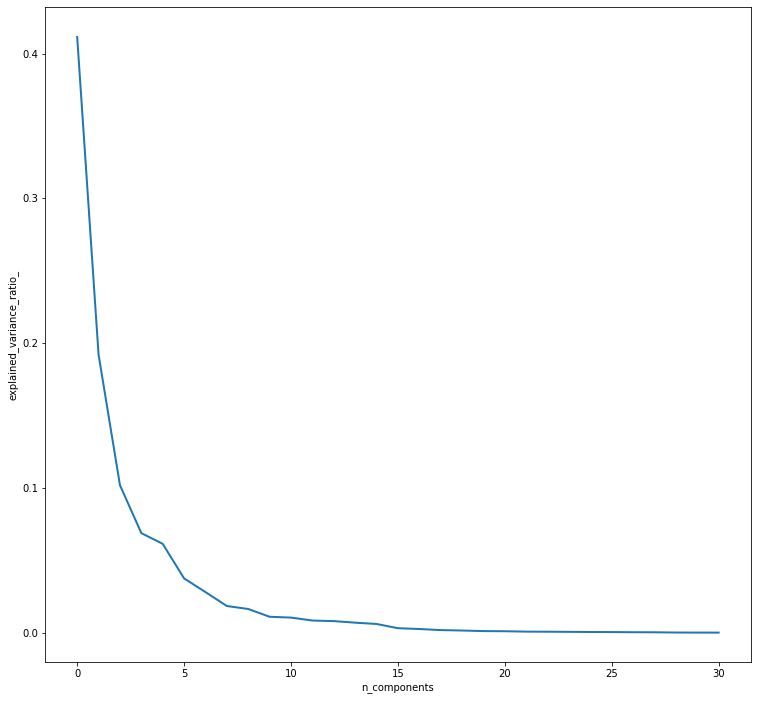

In [64]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

3 component can be chosen.

## Feature scaling

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [68]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.79327906e-11, 2.26599838e-13, 7.71965344e-15,
       4.41016157e-15, 2.03514820e-15, 1.64561981e-16, 1.55579644e-16,
       8.88956481e-18, 5.49042911e-18])

In [69]:
# saving exposed data
df.to_csv('../data/df.csv')

## Split data into training and hold-out set 

In [70]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 278
X_test 120
y_train 278
y_test 120


## Logistic regression model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [72]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 96.76
Testing Accuracy: % 94.17


Create a causal graph using all training data and get the insights (this will be considered the ground truth)

In [73]:
from causalinference import CausalModel
from causalinference.utils import random_data

In [74]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.feature_selection as feature_selection
from sklearn.base import BaseEstimator, TransformerMixin